In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
import matrices

train2=pd.read_csv("C:\\Users\\Rajeev kumar\\Downloads\\advertising.csv")
train2


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [5]:
#Supress warnings
import warnings
warnings.filterwarnings('ignore')

DATA INSPECTION

In [6]:
train2.shape

(200, 4)

In [7]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
train2.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
train2.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

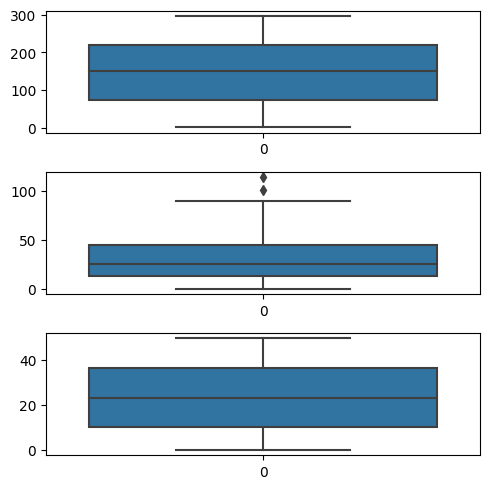

In [10]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(train2['TV'], ax = axs[0])
plt2 = sns.boxplot(train2['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(train2['Radio'], ax = axs[2])
plt.tight_layout()

In [11]:
# There are no considerable outliers present in the data.

DATA ANALYSIS

<Axes: >

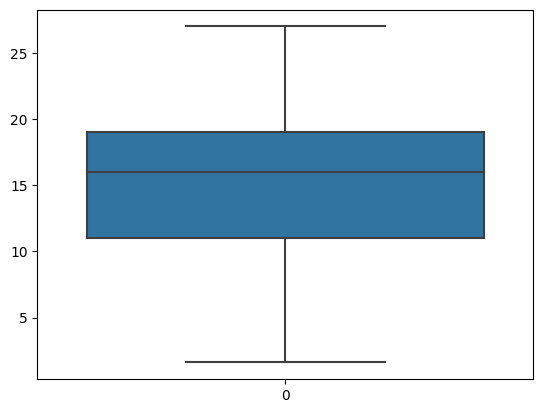

In [12]:
sns.boxplot(train2['Sales'])

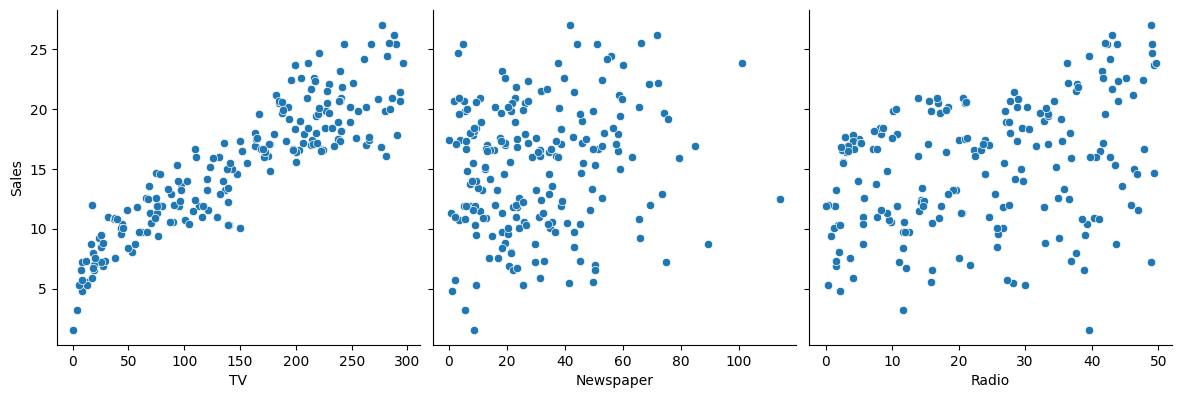

In [13]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(train2, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

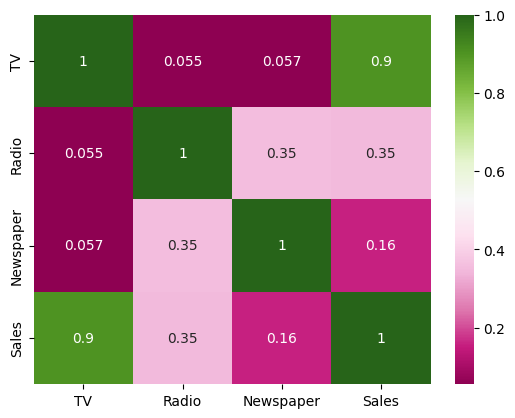

In [14]:
# Let's see the correlation between different variables.
sns.heatmap(train2.corr(), cmap="PiYG", annot = True)
plt.show()

As is visible from the pairplot and the heatmap, the variable TV seems to be most correlated with Sales. So let's go ahead and perform simple linear regression using TV as our feature variable.

MODEL BUILDING

Performing Linear Regression

Linear regression makes predictions for continuous/real or numeric variables such as sales, salary, age, product price, etc.

Linear regression algorithm shows a linear relationship between a dependent (y) and one or more independent (X) variables, hence called as linear regression. Since linear regression shows the linear relationship, which means it finds how the value of the dependent variable is changing according to the value of the independent variable.

The linear regression model provides a sloped straight line representing the relationship between the variables. Consider the below image:

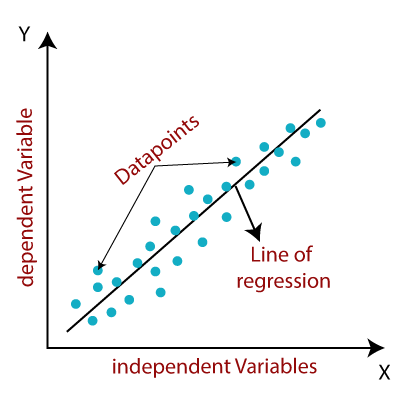


Mathematically, we can represent a linear regression as
y= a0+a1x+ ε


Y= Dependent Variable (Target Variable)
X= Independent Variable (predictor Variable)
a0= intercept of the line (Gives an additional degree of freedom)
a1 = Linear regression coefficient (scale factor to each input value).
ε = random error

The values for x and y variables are training datasets for Linear Regression model representation.


In [15]:
X = train2['TV']
y = train2['Sales']

Train-Test Split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [17]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [18]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

In [19]:
import statsmodels.api as sm

In [20]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [21]:
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [22]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Thu, 27 Jul 2023   Prob (F-statistic):           1.52e-52
Time:                        19:35:01   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

Looking at some key statistics from the summary

The values we are concerned with are:-

a.The coefficients and significance (p-values)

b.R-squared

c.F statistic and its significance


1. The coefficient for TV is 0.054, with a very low p value
The coefficient is statistically significant. So the association is not purely by chance.


2. R - squared is 0.816
Meaning that 81.6% of the variance in Sales is explained by TV
This is a decent R-squared value.


3. F statistic has a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

The fit is significant.Let's visualize how well the model fit the data.
From the parameters that we get, our linear regression equation becomes:
Sales=6.948+0.054×TV

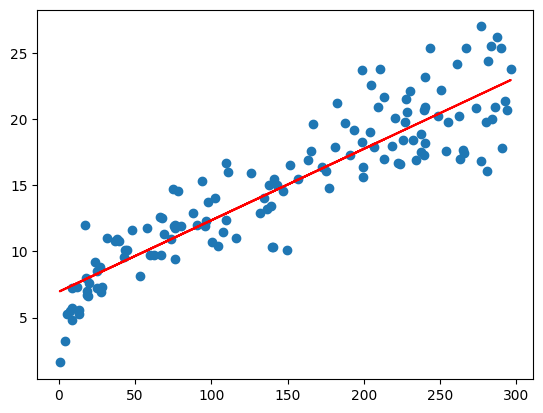

In [24]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

MODEL EVALUATION

In [25]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

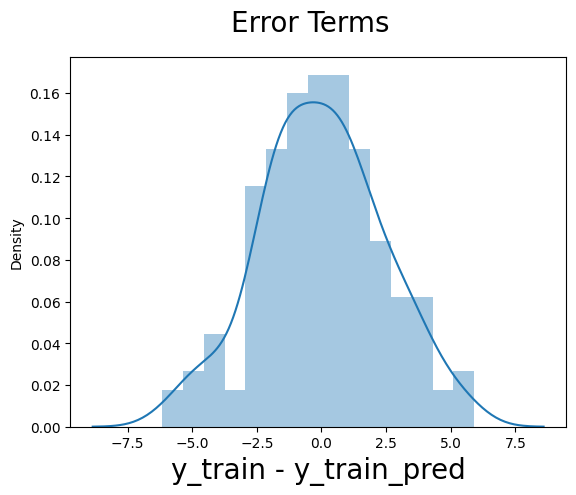

In [41]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 20)         # X-label
plt.show()

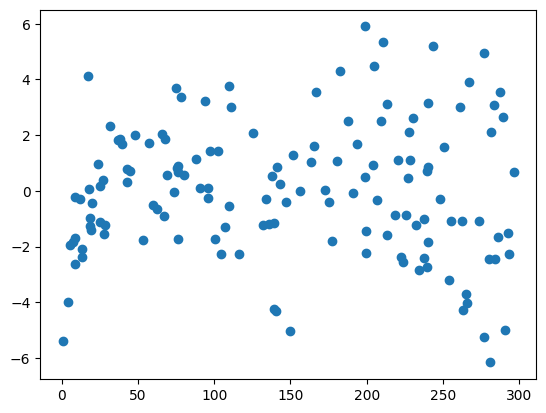

In [27]:
plt.scatter(X_train,res)
plt.show()

Predictions on the Test Set


Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, you first need to add a constant to the X_test data like you did for X_train and then you can simply go on and predict the y values corresponding to X_test using the predict attribute of the fitted regression line.

In [28]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [30]:
y_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [32]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

2.019296008966232

In [33]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.792103160124566

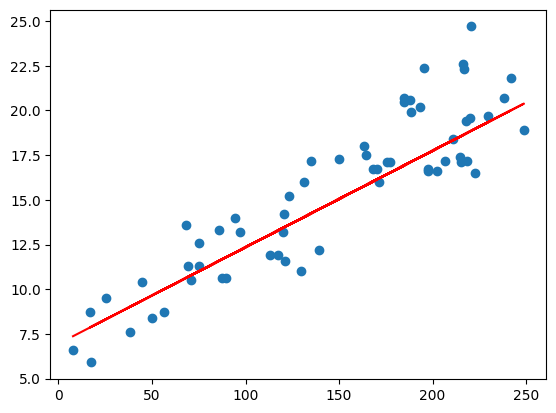

In [38]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()

THE CONCLUSION👍👍

The conclusion we get after programming is that there is a positive linear relationship between TV advertising and sales. This means that as the amount of TV advertising increases, the sales tend to increase as well. The R-squared value of 0.682 indicates that 68.2% of the variation in sales can be explained by the amount of TV advertising.

#Dataset source:https://www.kaggle.com/code/ashydv/sales-prediction-simple-linear-regression/input


This project is made by Rajeev kumar during internship at CodSoft